Kernel Density Estimation (KDE) plots are a valuable tool for visualizing data distributions by estimating their probability density function (PDF). These plots are particularly useful in regression analysis for comparing actual and predicted values.

KDE plots are beneficial in model evaluation for the following reasons:

- They provide a smooth approximation of the data distribution.
- They help compare the true vs. predicted distributions effectively.
- Unlike histograms, KDE plots are not sensitive to bin sizes.
- They can highlight deviations between observed and predicted values.

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [13]:
# Generating sample data

x = np.random.rand(100)*10
y = 3 * x + np.random.normal(0,3,100) # linear relation with noise
data = pd.DataFrame({'X' : x, 'Y' : y})
data.head()

,X,Y
0,0.197105,0.486351
1,1.041086,8.435659
2,7.999161,22.116581
3,1.785447,10.793686
4,6.527461,21.705639


In [14]:
# Splitting Data
X_train, X_test, y_train, y_test = train_test_split(data[['X']], data['Y'], test_size=0.2, random_state=42)

In [15]:
# Training a Model
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

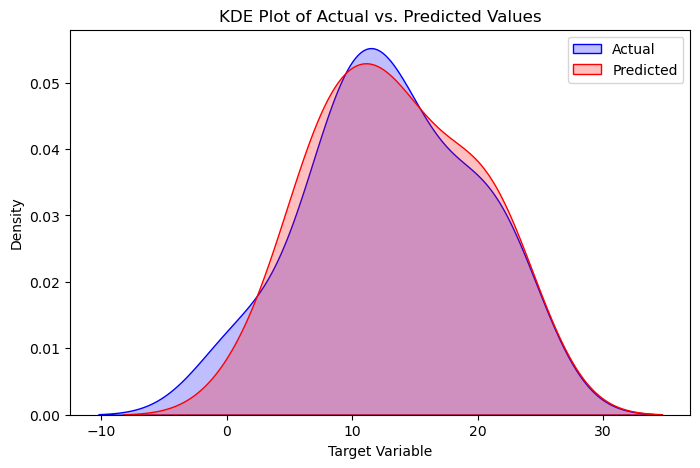

In [16]:
# Plotting KDE for Observed vs Predicted
plt.figure(figsize=(8, 5))
sns.kdeplot(y_test, label='Actual', fill=True, color='blue')
sns.kdeplot(y_pred, label='Predicted', fill=True, color='red')
plt.xlabel('Target Variable')
plt.ylabel('Density')
plt.title('KDE Plot of Actual vs. Predicted Values')
plt.legend()
plt.show()

Overlap Between Distributions: The two curves have a significant overlap, indicating that the model has captured the general distribution of the actual target values reasonably well. However, the predicted values slightly deviate from the actual values in some regions.

Peak Differences (Mode Shifts): The blue (actual) curve peaks slightly higher than the red curve, meaning that the actual values are more concentrated around certain values. The red (predicted) curve has a second peak, suggesting that the model may be slightly misestimating certain ranges of the target variable.

Spread of the Distributions: The actual values (blue) seem to have a wider spread, indicating more variation in real-world values.The predicted values (red) appear to be narrower, which suggests the model might be slightly underestimating variance (a sign of over-smoothing or bias).

Tails of the Distributions: The tails of the predicted values closely follow the actual values, meaning the model does not generate extreme outliers beyond what was observed in the data. If there was a significant mismatch in the tails, it could indicate that the model struggles with extreme cases.